#Numerical Homework 1

##Objectives

1. You will plot magnetic induction from a current loop. 

2. You will learn how to use Python

3. You will know how to make pretty figures for your future publications with an opensource software

##Let's get started

In [9]:
#first import all necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.special as spc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

###Program Explaination
First, you must tell python that you want to use certain plotting libraries. Always put these declarations on top.

The `#` sign means comment. You can write anything after it and it won't be considered by Python

##Set up the parameters

In [3]:
a = 2.0; #radius of the loop

###Physics Explaination
We set the loop radius to `a`.

###Program Explaination
Here we define a contant  to be used throughout this calclation. The variable is the same for our entire code, so we call it ***global variables***.  

Notice that the assignment is different from C; you don't really need to end the line with `;` But you could have it. The code won't die.

Notice also that there is no need to declar the variable type.

##Define B-field Functions

In [4]:
def Bx(x,z):
    k = np.sqrt(4*a*x/((a+x)**2+z**2))
    return z/(x*np.sqrt((x+a)**2+z**2))*((a**2+x**2+z**2)/((x-a)**2+z**2)*spc.ellipe(k)-spc.ellipk(k))

def Bz(x,z):
    k = np.sqrt(4*a*x/((a+x)**2+z**2))
    return 1/np.sqrt((x+a)**2+z**2)*((a**2-x**2-z**2)/((x-a)**2+z**2)*spc.ellipe(k)+spc.ellipk(k))

def BAlongZAxis(z):
    return np.pi*(a**2)/np.sqrt(a**2+z**2)**3

###Physics Explaination
Next, we will define functions for our calculation. In this case is the B-field that someone has already calculated analytically and also a simplified version of the field along the z-axis. 

###Program Explaination
1. Python ```functions``` is almost the as those functions for other language. The only difference is the way to define it (i.e. syntax). In Python, you use 

    (1) a keyword ```def```
    following by 

    (2) the funciton ```name``` and the arguments (position along x and z in our case) and 

    (3) a colon ```:```. 
    
    (4) The function must end with ```return``` keyword. Notice the python has no bracket ```{ }``` as in C. This is a speciality of Python. All you need is to line up the lines of code into blocks. In our case, the declaration of ```k``` parameter and ```return``` should be indented equally.

2. ```np.sqrt(x)``` is a square root of ```x```. ```np``` means you want to call a ```sqrt``` function from np namespace.

3. ```x**2``` is a square of ```x```; whike  ```x^2``` means other things in Python.
 
4. ```spc.ellipe(k)``` is to call the special Elliptical E function from the spc library. 

5. In python 2, 3/2 equals to 1 but 3.0/2.0 is 1.5. A special care must be taken when we want to take the power of 3/2.

##Verify that our formula is corrrect with some known limits

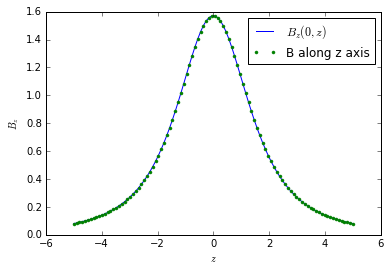

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

z = np.linspace(-5, 5, 100)
ax.plot(z, Bz(0,z),label="$B_z(0,z)$")
ax.plot(z, BAlongZAxis(z),'g.',label='B along z axis')
ax.set_ylabel('$B_z$')
ax.set_xlabel('$z$')
plt.legend()
plt.show()

###Physics Explaination
Here we will compare the two formula that we have derived: one from an undergraduate E&M for B-field along the z-axis and the more general one for any point in space.  Seems like the two formula agree pretty well.

###Program Explaination 
Now we will get more excited to see the plots! 
1. The first two lines 

    ```fig = plt.figure()
    ax = fig.add_subplot(111)```

    are needed to created figure and plot objects. We create `fig` first and then create `ax`, which inherits from `fig`.
2. ```z = np.linspace(-5, 5, 100)```

    creates evenly spaced numbers over a specified interval. Well, try googling "numpy linspace" to see by yourself.

3. ```ax.plot(z, Bz(0,z),label="$B_z(0,z)$")```
      
      makes a xy plot with `z` on the x axis and the fucnction `Bz(0,z)` on the y axis. Notice that you don't have to waste a line of code to firstly evaluate the fucnction `y1 = Bz(0,z)` and then do the `ax.plot(z, y1)`. The label will be used when displaying legend.
      
4. You can control the style of your plot with the option `'g.'`, which means I want to plot it as green dots. Otherwise, you will get only a line. 
5. Labeling the axis properly is one of the most important things to do for any plot. Use `ax.set_ylabel()` function.
6. You can typeset latex command for the legend and label.
7. Finally, you have to tell Python that you want to display the legend and the plot now by the functin `plt.legend()` and `plt.show()`.

###Homework1
Modify this code so that it includes a ***title*** on ***top*** of you graph. Put your ***name, last name and your student ID*** as the title; for example, 'Nairo Quintana 45051234'. Save the figure and submit it via email to me.

**Hint** Add `plt.title('xx')` command.

##B-Field from Helmholtz coil

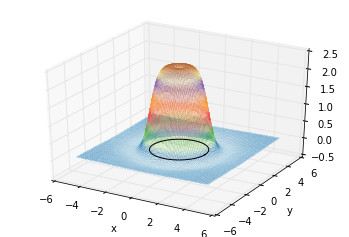

In [6]:
#Helmholtz coil 
D = a
z = a/2
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xv, yv = np.meshgrid(x, y)
rho = np.sqrt(xv**2+yv**2)
BHelmholtz = Bz(rho,z)+Bz(rho,z-D)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(xv, yv, BHelmholtz, rstride=1, cstride=1,cmap=cm.Paired,
        linewidth=0, antialiased=False,alpha=0.2)

#draw a loop on a base line
theta = np.linspace(0, 2*np.pi, 100)
x = a*np.cos(theta)
y = a*np.sin(theta)
ax.plot(x, y, 'k',zs=0)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

###Physics Explaination 
Helmholtz coils are an electromagnet cosisting of two current loops runing at the same direction. It should provide a very uniform magnetic field along z direction. But the disadvantage is the fact that the field is very weak.

<img src="helmholtz.png">

With our geometry, we put one loop on the plane z=0 and the other on the plane z=D=a. Therefore the distance to z from the two loops  would be z and z-D. Therefore, the resultant B-field is `Bz(rho,z-D)+Bz(rho,z)`.

###Program Explaination 
 This will be your first 3D plot. 
 
1. First, we create the grid along x and y plane with the command 
 
     ```
        x = np.linspace(-5, 5, 100)
        y = np.linspace(-5, 5, 100)
        xv, yv = np.meshgrid(x, y)```

    Our grid will run from -5 to 5 for the sampling of 100 points for each direction.

2. We calculate the radius rho from the z-axis. This is because we know that our field has the symmetry around the z-axis.
 
    ```
        rho = np.sqrt(xv**2+yv**2)
        BHelmholtz = Bz(rho,z)+Bz(rho,z-D)```

3. Next we prepare the 3D plot

    ```
        fig = plt.figure()
        ax = fig.gca(projection='3d')```

4. Do the plot
    ```
        ax.plot_surface(xv, yv, BHelmholtz, rstride=1, cstride=1,cmap=cm.Paired,
        linewidth=0, antialiased=False,alpha=0.2)```

The most important parameters are the first three to plot `xv` on x, `yv` on y and `BHelmholtz` on z. Try to play with other arguments by removing it. See the final results.
        

###Homework2
Create other styles of 3d plots. Use other colormap rather than `cmap=cm.Paired`. Plot for other z distance rather than `a/2`. Specify the colormap and your z distance style on the title.  For example, in the current drawing, the title should be  'Colormap = Paired z=a/2=1'

Again these links will help you. http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
http://matplotlib.org/examples/color/colormaps_reference.html

And again don't forget your name and ID.

##Field Uniformity of Helmholtz Coil

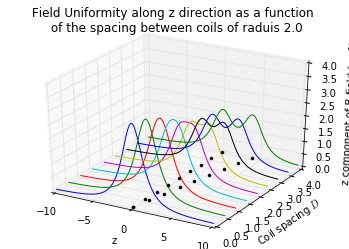

In [7]:
#Helmholtz coil vary D
fig = plt.figure()
ax = fig.gca(projection='3d')

D = np.linspace(0, 2*a,9)
z = np.linspace(-10, 10, 100)

for spacing in D:
    ax.plot(z,Bz(0,z)+Bz(0,spacing-z),zs=spacing,zdir='y')
    ax.plot([0, spacing],[spacing, spacing],'k.')
    
plt.title('Field Uniformity along z direction as a function \n of the spacing between coils of raduis '+ str(a))
ax.set_xlabel('z')
ax.set_ylabel('Coil spacing $D$')
ax.set_zlabel('z component of B-field (x=0)')
plt.show()

###Physics Explaination 
You could see that when the coil spacing is equal to the raduis of the coils. The field will be the most uniform along z axis. In our case with `spacing` of 2

###Program Explaination 
In this example, we will use one of the most imporant features of Python: the `for` loop. It will be a liite confusing at first.

1) The ***`for` loop*** starts with `for spacing in D:`, which means that we want to do loop over `D`. `D` is a list of numbers. By calling `print D` at any new code area below, you will see that `D` contain many numbers (`[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4. ]`).
Python will replace `spacing` by each element during each `for` loop or

|iteration|Spacing|
|------|------|
|1  |0  |
|2  |0.5  |
|3  |1  |
|4  |1.5  |
|5  |2  |
|6  |2.5  |
|7  |3  |
|8  |3.  |
|9  |4  |
2) Within each loop, two plots are made

    ax.plot(z,Bz(0,z)+Bz(0,spacing-z),zs=spacing,zdir='y')
    ax.plot([0, spacing],[spacing, spacing],'k.')
 
The first one will plot x as `z`, y as `Bz(0,z)+Bz(0,spacing-z)` and z as `spacing`. However, we will rotate the plot and tell python that we would like to realign `y` aling z direction.

The second one are lists of two number to specify the position of the coil: one at z=`0` the other at z=`spacing`. The second list is our y. They are included so that the black dots are lined up properly. We need to have the same number of elements of list for the first (x) and second argument (y).

3) Finally, to include the plot title. 

    plt.title('Field Uniformity along z direction as a function \n of the spacing between coils of raduis '+ str(a)). 
    
   The last section of the code shows you that you can add a string `'Field Uniformity ...radius '` with another string `str(a)`. This process is called ***string concatenation*** i.e. adding strings together.

The function `str(a)` change the type of a from integer of 2.0 to a string of `'2.0'`. This process is called ***type casting***.


###Homework3 
Extend the range of D spacing to D = 20 and increase the number of plots (now 9) to 19. Adjust the range of plots along z  accordingly ( via the line `z = np.linspace(-10, 10, 100)
`). Use `ax.set_zlim` to scale the height of the plot.



In [8]:
print D

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4. ]


###Explore more
More on function https://www.youtube.com/watch?v=qO4ZN5uZSVg

More on for loop http://www.tutorialspoint.com/python/python_for_loop.htm  

https://www.youtube.com/watch?v=Q3T1yyGQd6o

More of string concatenation https://www.youtube.com/watch?v=7C4CpjbqwrY

More on Helmholtz coil http://www.gmw.com/electromagnets/Uniform_Field/5451/5451.html